In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)  # 设置随机数种子
import matplotlib.pyplot as plt
# 设置画布
plt.rc('figure', figsize=(10, 6))
# 设置最大显示行数
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
# 设置打印精确度
np.set_printoptions(precision=4, suppress=True)


Bad key savefig.frameon in file /Users/mengyuanxu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/mengyuanxu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/mengyuanxu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

# 1. 日期和时间数据的类型及工具（重要）
Python标准库包含了日期和时间数据类型，也包括日历相关的功能。datetime、time和calender模块是开始处理时间数据的主要内容。

In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2020, 7, 28, 19, 12, 52, 625800)

In [3]:
now.year, now.month, now.day

(2020, 7, 28)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(delta)
print(delta.days)
print(delta.seconds)

926 days, 15:45:00
926
56700


In [5]:
# timedelta计算两个datetime对象的时间差
from datetime import timedelta
start = datetime(2011, 1, 7)
print(start + timedelta(12))
print(start - 2 * timedelta(12))

2011-01-19 00:00:00
2010-12-14 00:00:00


## 1.1 字符串与datetime互相转换

In [6]:
stamp = datetime(2011, 1, 3)
print(stamp, type(stamp))
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'))

2011-01-03 00:00:00 <class 'datetime.datetime'>
2011-01-03 00:00:00
2011-01-03


In [7]:
print(stamp.strftime('%F'))
print(stamp.strftime('%Y%m%d')) # 20110103
print(stamp.strftime('%Y/%m/%d'))  # 2011/01/03
print(type(stamp.strftime('%D')))  # 01032011

2011-01-03
20110103
2011/01/03
<class 'str'>


$$ datetime格式说明 $$

| 类型 | 描述 |
| --- | --- |
| `%Y` | 四位的年份 |
| `%y` | 两位的年份 |
| `%m` | 两位的月份[01, 12] |
| `%d` | 两位的日期号[01, 31] |
| `%H` | 小时，24小时制 |
| `%I` | 小时，12小时制 |
| `%M` | 两位的分钟[00, 59] |
| `%S` | 秒[00, 61] |
| `%w` | 星期日期[0(星期天), 6] |
| `%U` | 一年中的星期数[00, 53]。以星期天为每周的第一天，一年中的第一个星期天前的日期作为“第0周” |
| `%W` | 一年中的星期数[00, 53]。以星期一为每周的第一天，一年中的第一个星期一前的日期作为“第0周” |
| `%z` | 格式为+HHMM或-HHMM的UTC时区偏移；如果没有时区则为空 |
| `%F` | `%Y-%m-%d`的简写（例如，2012-4-18） |
| `%D` | `%m/%d/%y`的简写（例如，04/18/12） |

In [8]:
value = '2011-01-03'
print(datetime.strptime(value, '%Y-%m-%d'))  # 日期格式需和字符串的日期格式完全匹配
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(i, '%m/%d/%Y')
    for i in datestrs]

# [datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

2011-01-03 00:00:00


[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [9]:
# dateutil包的parser.parse方法可以解析大部分人类可理解的日期表达示
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [10]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [11]:
parse('6/12/2011', dayfirst=True)  # 让日期出现在月份之前

datetime.datetime(2011, 12, 6, 0, 0)

In [12]:
# pandas中，主要面向日期数组做处理
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [13]:
datestrs + [None]

['2011-07-06 12:00:00', '2011-08-06 00:00:00', None]

In [14]:
idx = pd.to_datetime(datestrs + [None])
print(idx)
print(idx[2])
pd.isnull(idx)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)
NaT


array([False, False,  True])

# 2. 时间序列基础——了解时间序列数据（重要）
时间序列（Time-Series）：索引是日期的序列

In [15]:
from datetime import datetime
# 利用datetime函数生成一个日期列表
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)  # 时间序列数据的本质就是index的对象类型是datetime
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [16]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [17]:
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [18]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [19]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

## 2.1 索引、选择、子集

In [20]:
# 传递“一个”能解释为日期的字符串(时间序列数据特有的操作方法)
print(ts['1/10/2011'])
print(ts['20110110'])

1.9657805725027142
1.9657805725027142


In [21]:
pd.date_range('1/1/2000', periods=1000)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [22]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [23]:
# 传递一个年份或年份和月份来选取数据的切片
longer_ts['2001']
# longer_ts['20010101':'20011231']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [24]:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [25]:
# datetime对象也可以对时间序列数据进行作切片
from datetime import datetime
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [26]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [27]:
# 使用不包含在时间序列中的时间戳进行切片
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [28]:
# 但不可以直接用字符串列表进行索引
ts[['2011-01-07', '2011-01-10']]

KeyError: "None of [Index(['2011-01-07', '2011-01-10'], dtype='object')] are in the [index]"

In [29]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [30]:
# truncate方法，可以在两个日期间对Series进行切片
ts.truncate(before='1/9/2011')

2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [31]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['2001-05':'2001-06',]  # 时间序列的切片操作都是前后包括的

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001
2001-06-06,2.406778,0.841176,-0.749181,-2.989741
2001-06-13,-1.295289,-1.690195,2.628441,-0.424586
2001-06-20,-1.314372,-0.010593,-0.497175,0.964021
2001-06-27,-0.705833,1.685665,-0.927844,-0.404840


## 2.2 含有重复索引的时间序列

In [32]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [33]:
dup_ts.index.is_unique

False

In [34]:
dup_ts['1/3/2000']  # not duplicated

4

In [35]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [36]:
# groupby方法下的level=0
# 聚合含有非唯一时间戳的数据
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [37]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 3. 日期范围、频率和移位（重要）
pandas的通用时间序列是不规则的，即时间序列的频率是不固定的。  
然而，经常有需要处理固定频率的场景，例如每日的、每月的或每15分钟，这意味着我们甚至需要在必要的时候向时间序列中引入缺失值。  
幸运的是，pandas拥有一整套标准的时间序列频率和工具用于重新采样、推断频率以及生成固定频率的数据范围，如：`resample`方法，将样本时间序列转换为固定的每日频率数据。

In [38]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.488675,-0.178098,2.122315,0.061192
2000-01-12,0.884111,-0.608506,-0.072052,0.544066
2000-01-19,0.323886,-1.683325,0.526860,1.858791
2000-01-26,-0.548419,-0.279397,-0.021299,-0.287990
2000-02-02,0.089175,0.522858,0.572796,-1.760372
...,...,...,...,...
2001-10-31,-0.054630,-0.656506,-1.550087,-0.044347
2001-11-07,0.681470,-0.953726,-1.857016,0.449495
2001-11-14,-0.061732,1.233914,0.705830,-1.309077
2001-11-21,-1.537380,0.531551,2.047573,0.446691


In [42]:
# 按月采样
resampler = long_df.resample('M')  # M表示月
for i, res in resampler:
    print(i)
    print(res)

2000-01-31 00:00:00
            Colorado     Texas  New York      Ohio
2000-01-05  0.488675 -0.178098  2.122315  0.061192
2000-01-12  0.884111 -0.608506 -0.072052  0.544066
2000-01-19  0.323886 -1.683325  0.526860  1.858791
2000-01-26 -0.548419 -0.279397 -0.021299 -0.287990
2000-02-29 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-02  0.089175  0.522858  0.572796 -1.760372
2000-02-09  1.128179  1.568606 -0.342277 -0.009813
2000-02-16  0.053072 -0.041943 -1.694312 -0.362381
2000-02-23  1.127453  2.183830 -1.186623  0.334270
2000-03-31 00:00:00
            Colorado     Texas  New York      Ohio
2000-03-01 -1.028389 -0.168496 -0.998948 -1.531151
2000-03-08 -1.079111 -1.097732  0.405148 -0.227228
2000-03-15 -1.442792 -1.422575 -1.123165  0.216205
2000-03-22 -0.459849  0.333392 -0.254742 -0.448301
2000-03-29 -1.261344  1.165148 -0.621249 -0.799318
2000-04-30 00:00:00
            Colorado     Texas  New York      Ohio
2000-04-05  0.777233 -0.612905  0.316447  0.838295
20

In [44]:
# 相当于按月分组
long_df.groupby([long_df.index.year, long_df.index.month]).mean()

Colorado     Texas  New York      Ohio
2000 1   0.287063 -0.687332  0.638956  0.544015
     2   0.599470  1.058338 -0.662604 -0.449574
     3  -1.054297 -0.238053 -0.518591 -0.557959
     4  -0.008919  0.641778 -0.986718  0.027798
     5   0.008107  0.270811 -0.223388  0.255118
...           ...       ...       ...       ...
2001 7   0.155679 -0.274346 -0.301053 -0.450499
     8   0.776548  0.006809 -0.388942 -0.373010
     9  -0.430814 -0.308970  0.353407  0.017993
     10  0.011852 -0.611294 -0.323346  0.483919
     11 -0.285300  0.226143  0.403115  0.061077

[23 rows x 4 columns]

## 3.1 生成日期范围

In [45]:
pd.date_range?

In [46]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [47]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')  # BM：月度业务结尾

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

$$ 基础时间序列频率(部分) $$

| 别名| 偏置类型 | 描述 |
| --- | --- | --- |
| D | Day | 日历日的每天 |
| B | BusinessDay | 工作日的每天 |
| H | Hour | 每小时 |
| T或min | Minute | 每分钟 |
| S | Second | 每秒 |
| L或ms | Milli | 每毫秒(1/1000秒) |
| U | Micro | 每微秒(1/1000000秒) |
| M | MonthEnd | 日历日的月底日期|
| BM | BusinessMonthEnd | 工作日的月底日期 |
| MS | MonthBegin | 日历日的月初日期 |
| BMS | BusnessMonthBegin | 工作日的月初日期 |
|W-MON, W-TUE, ...| Week | 按照给定的星期日期按照每周取日期 |
| ... | ... | ... |

In [50]:
# 默认保留开始或结束时间戳的时间（如果有的话）
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [42]:
# normalize参数生成标准化的零点时间戳
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 3.2 频率和日期偏置
pandas中的频率是由基础频率和倍数组成的。

In [51]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [52]:
# 传递一个整数来定义偏置量的倍数
four_hours = Hour(4)
four_hours

<4 * Hours>

In [53]:
# 在基础频率前放一个整数，可以生成倍数
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [54]:
# 多个偏置可以通过加法进行联合
Hour(2) + Minute(30)

<150 * Minutes>

In [55]:
# 传递频率字符串
pd.date_range('2000-01-01', periods=10, freq='1h20min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:20:00',
               '2000-01-01 02:40:00', '2000-01-01 04:00:00',
               '2000-01-01 05:20:00', '2000-01-01 06:40:00',
               '2000-01-01 08:00:00', '2000-01-01 09:20:00',
               '2000-01-01 10:40:00', '2000-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='80T')

### 3.2.1 月中某星期的日期
“月中某星期的日期”（week of month）的日期是一个有用的频率类，以“WOM”开始。  
它允许你可以获取每月第三个星期五这样的日期

In [56]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## 3.3 移位（前向和后向）日期
移位是指将日期按时间向前移动或向后移动。

In [81]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.202469
2000-02-29    0.050718
2000-03-31    0.639869
2000-04-30    0.597594
Freq: M, dtype: float64

In [85]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.202469
2000-04-30    0.050718
Freq: M, dtype: float64

In [61]:
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

ts / ts.shift(1) - 1

In [86]:
ts.shift(2, freq='M')

2000-03-31   -0.202469
2000-04-30    0.050718
2000-05-31    0.639869
2000-06-30    0.597594
Freq: M, dtype: float64

In [87]:
ts.shift(3, freq='D')

2000-02-03   -0.202469
2000-03-03    0.050718
2000-04-03    0.639869
2000-05-03    0.597594
dtype: float64

In [88]:
ts.shift(3, freq='90T')

2000-01-31 04:30:00   -0.202469
2000-02-29 04:30:00    0.050718
2000-03-31 04:30:00    0.639869
2000-04-30 04:30:00    0.597594
Freq: M, dtype: float64

In [89]:
ts-ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.842338
2000-04-30    0.546877
Freq: M, dtype: float64

In [91]:
ts.diff()  # ts-ts.shift(2)

2000-01-31         NaN
2000-02-29    0.253186
2000-03-31    0.589152
2000-04-30   -0.042275
Freq: M, dtype: float64

In [92]:
ts.pct_change()  # (ts-ts.shift())/ts.shift()

2000-01-31          NaN
2000-02-29    -1.250496
2000-03-31    11.616324
2000-04-30    -0.066068
Freq: M, dtype: float64

### 3.3.1 使用偏置进行位移日期

In [94]:
Day()

<Day>

In [95]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()  # now + timedelta(3)

Timestamp('2011-11-20 00:00:00')

In [97]:
print(now + MonthEnd())  # 当月月末
print(now + 2*MonthEnd())

2011-11-30 00:00:00
2011-12-31 00:00:00


In [98]:
# rollforward和rollback分别显示地将日期向前或向后“滚动”
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [99]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [100]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.797246
2000-01-19    0.472879
2000-01-23    0.522356
2000-01-27   -0.546348
2000-01-31   -0.733537
2000-02-04    1.302736
2000-02-08    0.022199
2000-02-12    0.364287
2000-02-16   -0.922839
2000-02-20    0.312656
2000-02-24   -1.128497
2000-02-28   -0.333488
2000-03-03   -0.514551
2000-03-07   -0.559782
2000-03-11   -0.783408
2000-03-15   -1.797685
2000-03-19   -0.172670
2000-03-23    0.680215
2000-03-27    1.607578
2000-03-31    0.200381
Freq: 4D, dtype: float64

In [101]:
# 位移方法与groupby一起使用
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.216379
2000-02-29   -0.054707
2000-03-31   -0.167490
dtype: float64

In [80]:
# groupby和resample的搭配
ts.resample('M').mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

# 4. 时区处理
Python语言中，时区信息来源于第三方库pytz。  


In [2]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [3]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

pandas封装了pytz的功能，相关时区名称可在文档中找到。### Time Zone Localization and Conversion

In [4]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.204708
2012-03-10 09:30:00    0.478943
2012-03-11 09:30:00   -0.519439
2012-03-12 09:30:00   -0.555730
2012-03-13 09:30:00    1.965781
2012-03-14 09:30:00    1.393406
Freq: D, dtype: float64

In [5]:
print(ts.index.tz)

None


In [24]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')  # UTC是格林尼治时间的后继者，目前的国际标准

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [7]:
ts_utc = ts.tz_localize('UTC')
print(ts_utc)
print(ts_utc.index)

2012-03-09 09:30:00+00:00   -0.204708
2012-03-10 09:30:00+00:00    0.478943
2012-03-11 09:30:00+00:00   -0.519439
2012-03-12 09:30:00+00:00   -0.555730
2012-03-13 09:30:00+00:00    1.965781
2012-03-14 09:30:00+00:00    1.393406
Freq: D, dtype: float64
DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')


In [8]:
# tz_convert方法，本地化为某个特定的时区
ts_utc.tz_convert('America/New_York')  # 将本地时间(UTC)转化为美国纽约时间

2012-03-09 04:30:00-05:00   -0.204708
2012-03-10 04:30:00-05:00    0.478943
2012-03-11 05:30:00-04:00   -0.519439
2012-03-12 05:30:00-04:00   -0.555730
2012-03-13 05:30:00-04:00    1.965781
2012-03-14 05:30:00-04:00    1.393406
Freq: D, dtype: float64

In [9]:
ts_eastern = ts.tz_localize('America/New_York')  # 将纽约时间设置成本地时间
ts_eastern

2012-03-09 09:30:00-05:00   -0.204708
2012-03-10 09:30:00-05:00    0.478943
2012-03-11 09:30:00-04:00   -0.519439
2012-03-12 09:30:00-04:00   -0.555730
2012-03-13 09:30:00-04:00    1.965781
2012-03-14 09:30:00-04:00    1.393406
dtype: float64

In [10]:
ts_eastern.tz_convert('UTC')  # 将本地时区(纽约时间)转化为UTC时区

2012-03-09 14:30:00+00:00   -0.204708
2012-03-10 14:30:00+00:00    0.478943
2012-03-11 13:30:00+00:00   -0.519439
2012-03-12 13:30:00+00:00   -0.555730
2012-03-13 13:30:00+00:00    1.965781
2012-03-14 13:30:00+00:00    1.393406
dtype: float64

In [11]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.204708
2012-03-10 15:30:00+01:00    0.478943
2012-03-11 14:30:00+01:00   -0.519439
2012-03-12 14:30:00+01:00   -0.555730
2012-03-13 14:30:00+01:00    1.965781
2012-03-14 14:30:00+01:00    1.393406
dtype: float64

In [12]:
# tz_localize方法可以从简单时期转换到本地化时区
ts_sh = ts.tz_localize('Asia/Shanghai')
ts_sh

2012-03-09 09:30:00+08:00   -0.204708
2012-03-10 09:30:00+08:00    0.478943
2012-03-11 09:30:00+08:00   -0.519439
2012-03-12 09:30:00+08:00   -0.555730
2012-03-13 09:30:00+08:00    1.965781
2012-03-14 09:30:00+08:00    1.393406
dtype: float64

In [13]:
ts_sh.tz_convert('UTC')

2012-03-09 01:30:00+00:00   -0.204708
2012-03-10 01:30:00+00:00    0.478943
2012-03-11 01:30:00+00:00   -0.519439
2012-03-12 01:30:00+00:00   -0.555730
2012-03-13 01:30:00+00:00    1.965781
2012-03-14 01:30:00+00:00    1.393406
dtype: float64

In [46]:
s = pd.Series(ts_sh.index)
s.dt.tz_convert(None)

0   2012-03-09 01:30:00
1   2012-03-10 01:30:00
2   2012-03-11 01:30:00
3   2012-03-12 01:30:00
4   2012-03-13 01:30:00
5   2012-03-14 01:30:00
dtype: datetime64[ns]

# 5. 时期及其算术运算
时期表示的是时间区间，比如数日、数月、数季、数年等

In [115]:
# 创建一个时期
p = pd.Period(2007, freq='A-DEC')  # 表示以12月作为结束的一整年(annual)，这里表示从2007-01-01到2007-12
p

Period('2007', 'A-DEC')

In [116]:
# 通过加减整数可以实现对Period的移动
print(p + 5)
print(p - 2)

2012
2005


In [117]:
# 如果两个Period对象拥有相同频率，则它们的差就是它们之间的单位数量
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [118]:
pd.date_range('2000-01-01', '2000-06-30', freq='M')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30'],
              dtype='datetime64[ns]', freq='M')

In [119]:
# 创建规则的时期范围
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [120]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.423331
2000-02   -0.654040
2000-03    2.089154
2000-04   -0.060220
2000-05   -0.167933
2000-06    0.631634
Freq: M, dtype: float64

In [122]:
# PeriodIndex类的构造函数允许直接使用一组字符串表示一段时期
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')  # 在以12月结束的财年中，2001Q3是从7月到9月
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## 5.1 区间频率转换

In [123]:
p = pd.Period('2011', freq='A-DEC')
p

Period('2011', 'A-DEC')

In [9]:
# 将频率为年(20110101-20111231)转换频率为月201101
p.asfreq('M', how='start')

Period('2011-01', 'M')

In [124]:
# 将频率为年(20110101-20111231)转换频率为月201112
p.asfreq('M', how='end')

Period('2011-12', 'M')

In [125]:
p = pd.Period('2011', freq='A-JUN')
p

Period('2011', 'A-JUN')

In [127]:
print(p.asfreq('M', 'start'))
print(p.asfreq('M', 'end'))

2010-07
2011-06


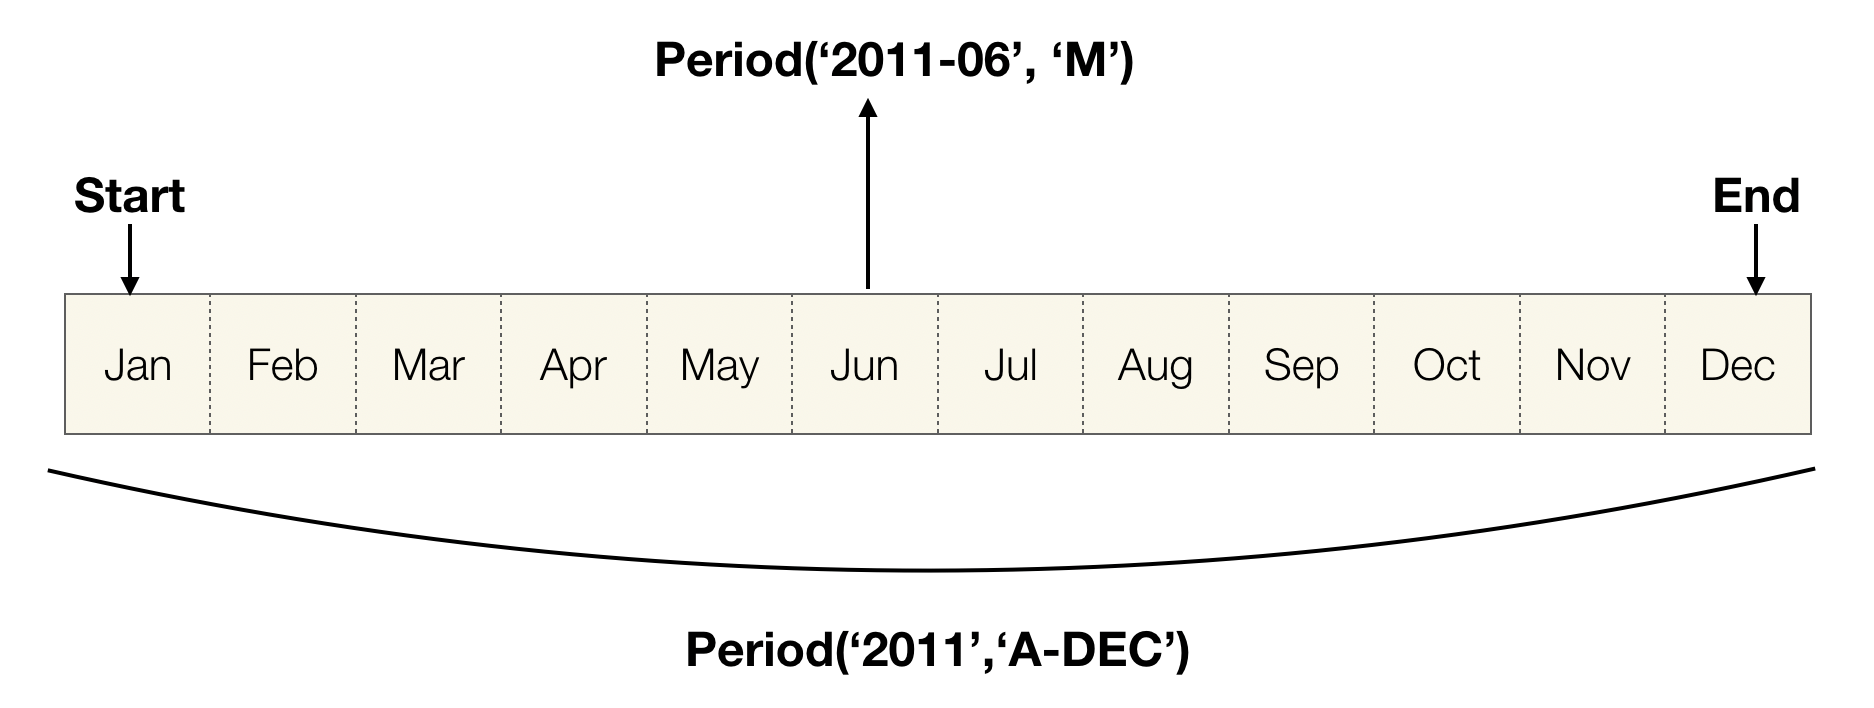

In [129]:
# 从高频率转换为低频率时，超时期(较大的时期)是由子时期(较小的时期)的位置决定的
p = pd.Period('Aug-2007', freq='M')  # 时期为2007年8月
p.asfreq('A-JUN')  # 200708对于频率A-JUN是属于2008年度的

Period('2008', 'A-JUN')

In [130]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
print(rng)
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]', freq='A-DEC')


2006   -1.594313
2007   -1.519937
2008    1.108752
2009    1.255853
Freq: A-DEC, dtype: float64

In [131]:
# 低频(年)转化为高频(月)
ts.asfreq('M', how='start')

2006-01   -1.594313
2007-01   -1.519937
2008-01    1.108752
2009-01    1.255853
Freq: M, dtype: float64

In [132]:
ts.asfreq('B', how='end')  # 工作日

2006-12-29   -1.594313
2007-12-31   -1.519937
2008-12-31    1.108752
2009-12-31    1.255853
Freq: B, dtype: float64

## 5.2 季度区间频率

In [133]:
p = pd.Period('2012Q4', freq='Q-JAN')  # Q-JAN是指1月末的工作日是财政年末
p

Period('2012Q4', 'Q-JAN')

In [134]:
print(p.asfreq('D', 'start'))
print(p.asfreq('D', 'end'))

2011-11-01
2012-01-31


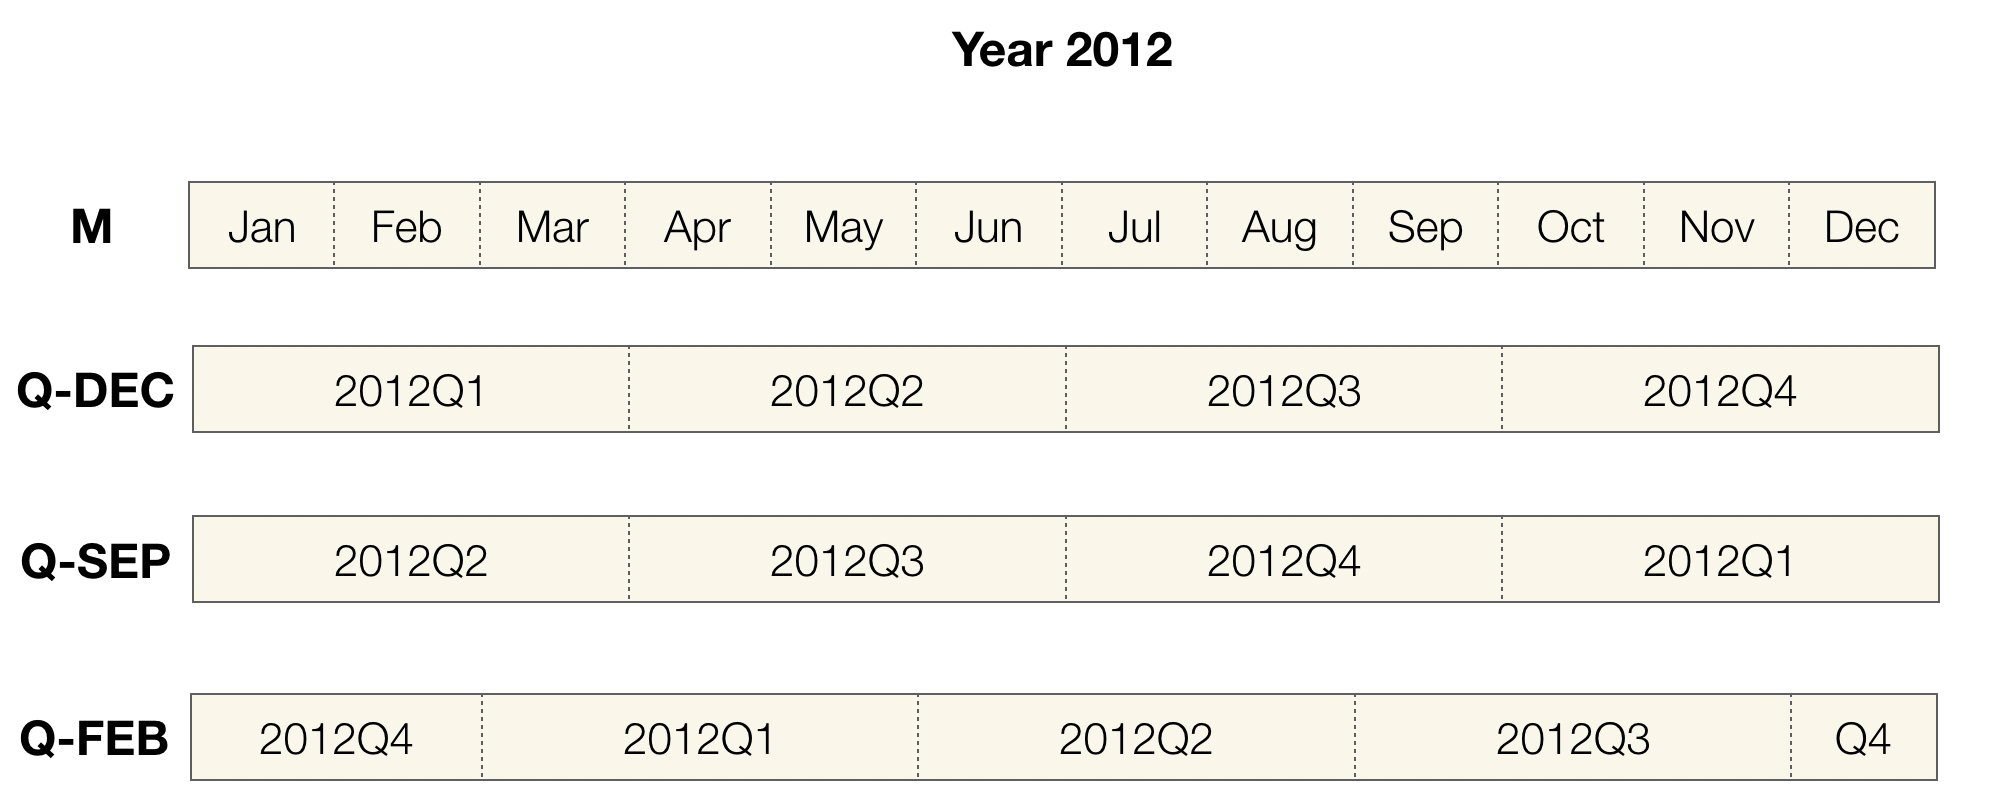

In [136]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

## 5.3 将时间戳转换为区间

In [141]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.575283
2000-02-29    0.304205
2000-03-31    1.814582
Freq: M, dtype: float64

In [142]:
pts = ts.to_period()
pts

2000-01    0.575283
2000-02    0.304205
2000-03    1.814582
Freq: M, dtype: float64

In [143]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    1.634858
2000-01-30   -1.645693
2000-01-31   -0.407164
2000-02-01   -0.252765
2000-02-02   -0.894590
2000-02-03    0.955842
Freq: D, dtype: float64

In [145]:
ts2.to_period('M')

2000-01    1.634858
2000-01   -1.645693
2000-01   -0.407164
2000-02   -0.252765
2000-02   -0.894590
2000-02    0.955842
Freq: M, dtype: float64

In [144]:
pts = ts2.to_period()
pts

2000-01-29    1.634858
2000-01-30   -1.645693
2000-01-31   -0.407164
2000-02-01   -0.252765
2000-02-02   -0.894590
2000-02-03    0.955842
Freq: D, dtype: float64

In [149]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    1.634858
2000-01-30 23:59:59.999999999   -1.645693
2000-01-31 23:59:59.999999999   -0.407164
2000-02-01 23:59:59.999999999   -0.252765
2000-02-02 23:59:59.999999999   -0.894590
2000-02-03 23:59:59.999999999    0.955842
Freq: D, dtype: float64

## 5.4 从数组生成PeriodIndex

In [153]:
data = pd.read_csv('../datas/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [154]:
print(data['year'])
print(data['quarter'])

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64
0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64


In [156]:
index = pd.PeriodIndex(year=data['year'], quarter=data['quarter'],
                       freq='Q-DEC')
index


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [159]:
data.index = index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


# 6. 重新采样与频率转换(`resample`)（重要）

In [3]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -1.565657
2000-01-02   -0.562540
2000-01-03   -0.032664
2000-01-04   -0.929006
2000-01-05   -0.482573
                ...   
2000-04-05    0.910983
2000-04-06   -1.020903
2000-04-07   -1.413416
2000-04-08    1.296608
2000-04-09    0.252275
Freq: D, Length: 100, dtype: float64

In [4]:
for periods, df in ts.resample('M'):
    print(periods)
    print(df)

2000-01-31 00:00:00
2000-01-01   -1.565657
2000-01-02   -0.562540
2000-01-03   -0.032664
2000-01-04   -0.929006
2000-01-05   -0.482573
                ...   
2000-01-27    0.107657
2000-01-28   -0.606545
2000-01-29   -0.417064
2000-01-30   -0.017007
2000-01-31   -1.224145
Freq: D, Length: 31, dtype: float64
2000-02-29 00:00:00
2000-02-01   -1.800840
2000-02-02    1.634736
2000-02-03    0.989008
2000-02-04    0.457940
2000-02-05    0.555154
                ...   
2000-02-25   -1.563740
2000-02-26   -0.367488
2000-02-27    1.045913
2000-02-28    1.219954
2000-02-29   -0.247699
Freq: D, Length: 29, dtype: float64
2000-03-31 00:00:00
2000-03-01   -0.416232
2000-03-02   -0.116747
2000-03-03   -1.844788
2000-03-04    2.068708
2000-03-05   -0.776967
                ...   
2000-03-27   -0.974378
2000-03-28   -0.634709
2000-03-29   -0.395701
2000-03-30   -0.289436
2000-03-31   -0.734297
Freq: D, Length: 31, dtype: float64
2000-04-30 00:00:00
2000-04-01   -0.728505
2000-04-02    0.838775
2000-04

In [115]:
ts.resample('M').mean()

2000-01-31    0.096105
2000-02-29   -0.032874
2000-03-31    0.061199
2000-04-30    0.435568
Freq: M, dtype: float64

In [5]:
ts.resample('M', kind='period').mean()

2000-01   -0.276258
2000-02    0.088453
2000-03    0.042473
2000-04    0.124878
Freq: M, dtype: float64

In [7]:
ts.resample?

## 6.1 向下采样
将数据聚合到一个规则的低频率上是一个常见的时间序列任务。

In [8]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [12]:
ts.resample('5T').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [14]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [120]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

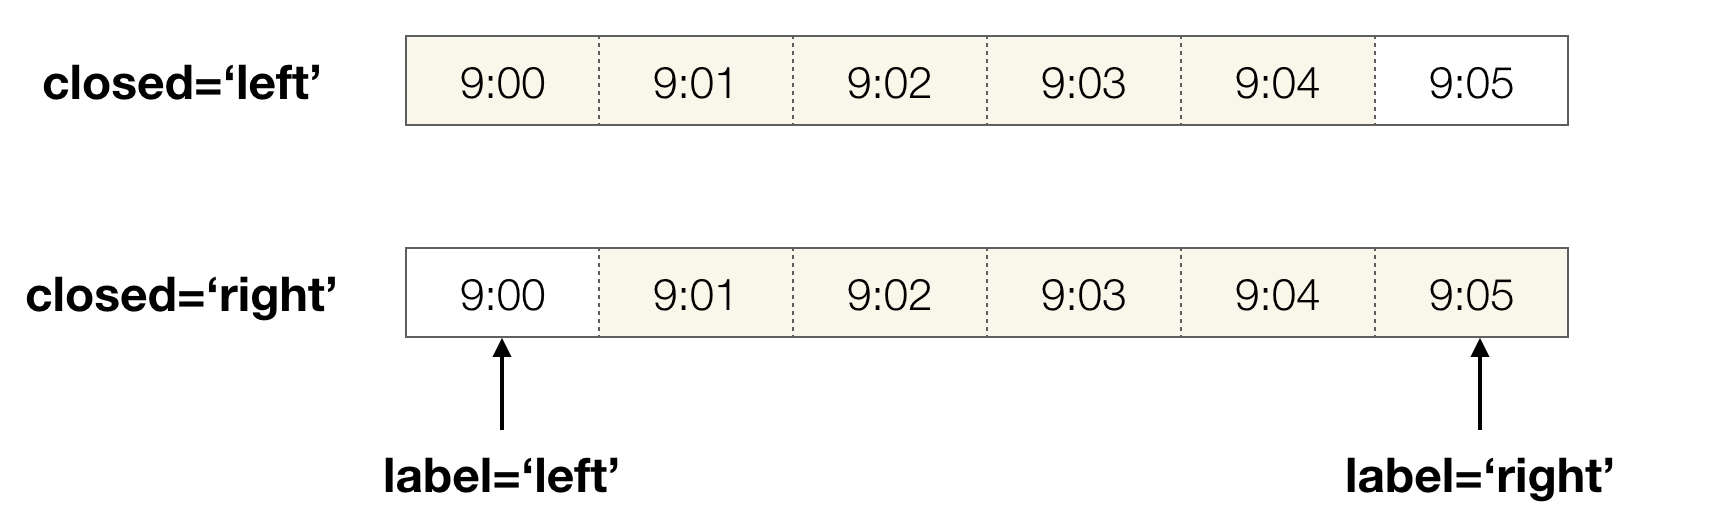

In [16]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

### 6.1.1 开端-峰值-谷值-结束(OHLC)重新采样

In [17]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [122]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## 6.2 向上采样与插值

In [19]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.751921,-0.132609,1.457300,0.609512
2000-01-12,-0.493779,1.239980,-0.135722,1.430042


In [20]:
frame.index

DatetimeIndex(['2000-01-05', '2000-01-12'], dtype='datetime64[ns]', freq='W-WED')

In [21]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.751921,-0.132609,1.457300,0.609512
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.493779,1.239980,-0.135722,1.430042


In [22]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.751921,-0.132609,1.457300,0.609512
2000-01-06,-0.751921,-0.132609,1.457300,0.609512
2000-01-07,-0.751921,-0.132609,1.457300,0.609512
2000-01-08,-0.751921,-0.132609,1.457300,0.609512
2000-01-09,-0.751921,-0.132609,1.457300,0.609512
2000-01-10,-0.751921,-0.132609,1.457300,0.609512
2000-01-11,-0.751921,-0.132609,1.457300,0.609512
2000-01-12,-0.493779,1.239980,-0.135722,1.430042


In [23]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.751921,-0.132609,1.457300,0.609512
2000-01-06,-0.751921,-0.132609,1.457300,0.609512
2000-01-07,-0.751921,-0.132609,1.457300,0.609512
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.493779,1.239980,-0.135722,1.430042


In [25]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.751921,-0.132609,1.457300,0.609512
2000-01-13,-0.493779,1.239980,-0.135722,1.430042


## 6.3 使用区间进行重新采样

In [26]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.846852,0.603282,1.263572,-0.255491
2000-02,-0.445688,0.468367,-0.961604,-1.824505
2000-03,0.625428,1.022872,1.107425,0.090937
2000-04,-0.350109,0.217957,-0.894813,-1.741494
2000-05,-1.052256,1.436603,-0.576207,-2.420294


In [27]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.361576,0.157748,0.142233,-0.564787
2001,-0.324955,-0.179134,-0.109798,-0.076168


In [35]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').asfreq()

,Colorado,Texas,New York,Ohio
2000Q1,-0.361576,0.157748,0.142233,-0.564787
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,-0.324955,-0.179134,-0.109798,-0.076168
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [36]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.361576,0.157748,0.142233,-0.564787
2001Q1,-0.361576,0.157748,0.142233,-0.564787
2001Q2,-0.361576,0.157748,0.142233,-0.564787
2001Q3,-0.361576,0.157748,0.142233,-0.564787
2001Q4,-0.324955,-0.179134,-0.109798,-0.076168


In [39]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.361576,0.157748,0.142233,-0.564787
2001Q1,-0.361576,0.157748,0.142233,-0.564787
2001Q2,-0.361576,0.157748,0.142233,-0.564787
2001Q3,-0.361576,0.157748,0.142233,-0.564787
2001Q4,-0.324955,-0.179134,-0.109798,-0.076168
2002Q1,-0.324955,-0.179134,-0.109798,-0.076168
2002Q2,-0.324955,-0.179134,-0.109798,-0.076168
2002Q3,-0.324955,-0.179134,-0.109798,-0.076168


# 7. 移动窗口函数(`rolling`)（重要）
假如现在拥有某个时间序列数据，数据的日期是完全连续的，  
则，2011-10-23的10日移动窗口数据：2011-10-14到2011-10-23期间的所有数据  
次日，2011-10-24的10日移动窗口数据：2011-10-15到2011-10-24期间的所有数据

In [41]:
close_px_all = pd.read_csv('../datas/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


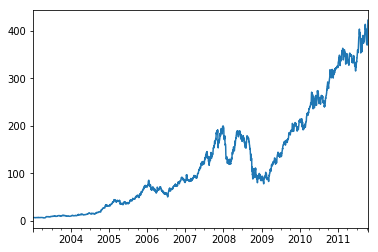

In [43]:
close_px['AAPL'].plot()

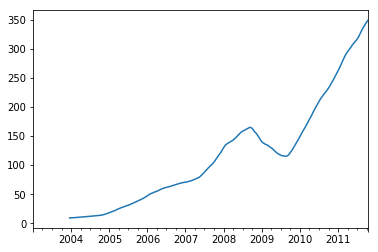

In [49]:
close_px['AAPL'].rolling(250).mean().plot()

In [138]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [51]:
appl_std250 = close_px['AAPL'].rolling(250, min_periods=10).std()
appl_std250[:12]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

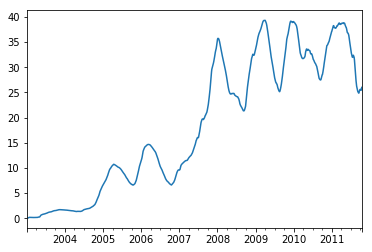

In [52]:
appl_std250.plot()

In [69]:
# expanding()函数只设置最小的观测值数量，不固定窗口大小，实现累计计算，即不断扩展；
# expanding()函数，类似cumsum()函数的累计求和，其优势在于还可以进行更多的聚类计算；
expanding_mean = close_px['AAPL'].expanding(10).mean()
expanding_mean[:20]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    7.355000
2003-01-16    7.350909
2003-01-17    7.325833
2003-01-20    7.304615
2003-01-21    7.283571
2003-01-22    7.260667
2003-01-23    7.250000
2003-01-24    7.229412
2003-01-27    7.220556
2003-01-28    7.224211
2003-01-29    7.236500
Freq: B, Name: AAPL, dtype: float64

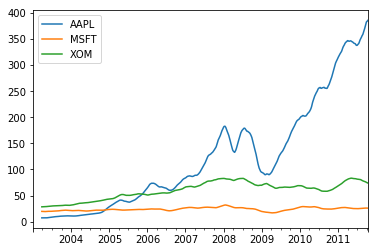

In [71]:
# 面向DataFrame的rolling
close_px.rolling(60).mean().plot()

## 7.2 指数加权函数(`ewm`)
指定一个常数衰减因子以向更多近期观测值提供更多权重，可以替代使用具有相等加权观察值的静态窗口尺寸的地方

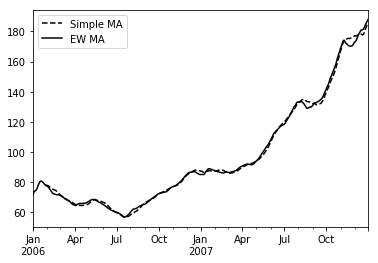

In [72]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()  # span=60的EW移动平均线
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

## 7.3 二元移动窗口函数

In [74]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [78]:
returns['SPX'] = spx_rets
returns[['AAPL', 'SPX']].rolling(125, min_periods=10).corr()

AAPL       SPX
2003-01-02 AAPL       NaN       NaN
           SPX        NaN       NaN
2003-01-03 AAPL       NaN       NaN
           SPX        NaN       NaN
2003-01-06 AAPL       NaN       NaN
...                   ...       ...
2011-10-12 SPX   0.728404  1.000000
2011-10-13 AAPL  1.000000  0.727165
           SPX   0.727165  1.000000
2011-10-14 AAPL  1.000000  0.729858
           SPX   0.729858  1.000000

[4584 rows x 2 columns]

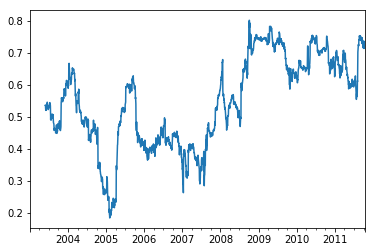

In [80]:
# 计算AAPL和SPX 125天的移动相关系数
corr = returns['AAPL'].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

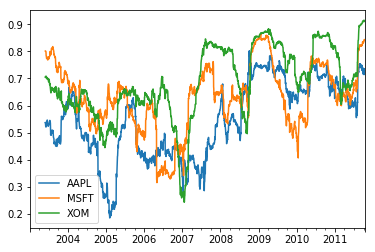

In [63]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

## 7.3 用户自定义的移动窗口函数

In [81]:
# 求移动250日窗口的累积收益率
cum_rtn = lambda x: (x.pct_change()+1).cumprod()[-1]-1
close_px['AAPL'].rolling(250).apply(cum_rtn)

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
                ...   
2011-10-10    0.262165
2011-10-11    0.300361
2011-10-12    0.317619
2011-10-13    0.357000
2011-10-14    0.387336
Freq: B, Name: AAPL, Length: 2292, dtype: float64